In [115]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from collections import Counter
# import spacy
# nlp = spacy.load('en_core_web_sm')

# from spacy.lang.en import English
# tokenizer = English().Defaults.create_tokenizer(nlp)


# def my_spacy_tokenizer(doc):
#     # TODO: need to add a phase to break -- offsets and strip white space.
#     tokens = tokenizer(doc)
#     return([token.text for token in tokens])




In [264]:
batch_names = ['batches/Batch_3613145_batch_results.csv', # empathetic-s2s
                'batches/Batch_3613732_batch_results.csv', # s2s persona
                'batches/Batch_3613854_batch_results.csv'] # empathetic transformer
raw_dfs = {}

for batch_name in batch_names: 
    raw_dfs[batch_name] = pd.read_csv(batch_name)
    
tot_cols = []
for batch_name in batch_names: 
    tot_cols.extend(raw_dfs[batch_name].columns)
tot_cols = set(tot_cols)


for batch_name in batch_names: 
    for col in tot_cols:
        if col not in raw_dfs[batch_name].columns: 
            raw_dfs[batch_name][col] = np.NaN
            
turk_df = pd.concat([raw_dfs[b][tot_cols] for b in batch_names], axis=0).reset_index()
    

In [265]:
turk_df[:3]

,index,WorkerId,Input.resp_3_8,Answer.gram_warmup_1,Answer.gram_6_2,Answer.rel_7,RejectionTime,Input.msg1_8,Answer.gram_6_4,Answer.gram_5_1,...,Answer.gram_5_3,Reward,Input.msg1_7,HITId,Answer.gram_2_4,Input.resp_3_4,Answer.gram_9_1,Title,Input.msg2_0,Input.msg2_7
0,0,A1PUHCEBSOWETV,oh no ! what did you do ?,NaN,NaN,1,NaN,--,NaN,NaN,...,NaN,$1.00,--,3VADEH0UHDHM6D8C6CVFJKAR6WLSP4,NaN,that sucks . i 'm sorry to hear that .,NaN,"Label the interestingness, relevance, and gram...",i wish i never did it now. i thought it wasn't...,i didn't really try to use weight but i starte...
1,1,A326TBFF587C3V,oh no ! what did you do ?,NaN,NaN,1,NaN,--,NaN,NaN,...,NaN,$1.00,--,3VADEH0UHDHM6D8C6CVFJKAR6WLSP4,4.0,that sucks . i 'm sorry to hear that .,NaN,"Label the interestingness, relevance, and gram...",i wish i never did it now. i thought it wasn't...,i didn't really try to use weight but i starte...
2,2,ABHV99SXGY9PD,oh no ! what did you do ?,NaN,2.0,3,NaN,--,4.0,NaN,...,NaN,$1.00,--,3VADEH0UHDHM6D8C6CVFJKAR6WLSP4,4.0,that sucks . i 'm sorry to hear that .,NaN,"Label the interestingness, relevance, and gram...",i wish i never did it now. i thought it wasn't...,i didn't really try to use weight but i starte...


In [266]:
turk_df['Answer.Justified Answer'].values

array(['{}',
       '"That\'s cool!" is the only coherent answer that directly responds to person 2.',
       'most interesting had an opportunity to continue the conversation',
       'The most relevant is the only choice that a nice response. The most interesting one is not relevant but it is still about sports',
       '{}', '{}',
       'Most relevant had to do with the conversation and most interesting was more irrelevant but seemed more interesting.',
       'he said he played tennis it has no link with the conversation but he brings something new',
       'I chose whichever answer was relevant and not a total gibberish.',
       "Most Relevant:  Straight to the point acknowledging Person 2's response.\rMost Interesting:  Moves the conversation along to a weirdly placed but unique fact about Person 1.",
       'The statement about tennis tells more of a story.',
       'I looked for the comment that related most closely to the topic for most relevant. I chose the comment that mad

In [267]:
turk_df['Answer.optionalfeedback'].values

array(['{}', '{}', '{}', '{}', 'none', '{}', '{}',
       "there's always 1 answer that looks like a mismatch between multiple sentece so i kept reporting ( not grammatical ) on them even if the sentences individually were correct",
       '{}', 'Thank you for the opportunity to work on this HIT!', '{}',
       '{}',
       'The assignment was not straightforward and leaves room for interpretation.  For example, one speaker said that a sister was favored and she was ignored.  It would be interesting if someone said, that\'s so sweet, it could imply sarcasm or some other features that involve the way we talk to one another.  Saying "i hope she gets better soon" opens up conversations about a possible serious illness which is also interesting.  Like wise saying "that sounds like a lot of fun" can be sarcasm if it\'s in response to finding a lost item, in that case it would be interesting but relevant.',
       '{}', '{}', '{}',
       "This is a strange task, in that for several conversa

# Check results on the warmup question

### Which option was selected as most interesting response:

In [268]:
Counter(turk_df['Answer.int_warmup'].values).most_common()

[(3, 53), (4, 13), (1, 12), (2, 12)]

### Which option was selected as most relevant response:

In [269]:
Counter(turk_df['Answer.rel_warmup'].values).most_common()

[(1, 76), (3, 10), (2, 3), (4, 1)]

### Number of times each warmup option was flagged as not grammatical

In [270]:
print('below are counts out of %s:' % turk_df.shape[0])
print(np.sum(~np.isnan(turk_df['Answer.gram_warmup_1'].values)))
print(np.sum(~np.isnan(turk_df['Answer.gram_warmup_2'].values)))
print(np.sum(~np.isnan(turk_df['Answer.gram_warmup_3'].values)))
print(np.sum(~np.isnan(turk_df['Answer.gram_warmup_4'].values)))

below are counts out of 90:
2
65
11
55


In [271]:
turk_df['Input.model_%s_%s' % (option, ex)].unique()

array(['Empathetic idf', 'Empathetic face', 'Empathetic idfswapping',
       'Personachat face', 'Personachat s2s', 'Personachat idfswapping',
       'Personachat idf', 'Empathetic transformer idf',
       'Empathetic transformer idfswapping', 'Empathetic transformer',
       'Empathetic transformer face'], dtype=object)

In [272]:
turk_df['Input.model_1_1'].shape

(90,)

In [273]:

model_order = ['s2s', 'transformer', 'lm']
method_order = ['vanilla', 'idf', 'idfswapping', 'face']
choice_df = []
grammar_df = []
for i in turk_df.index:
    row = turk_df.loc[i]
    hit_num = i
    worker_id = row['WorkerId']
    for ex in range(10): 
        
        option_to_method = {}
        method_to_resp = {}
        method_to_gram = {}
        for option in range(1, 5):
            model_pieces = row['Input.model_%s_%s' % (option, ex)].split(' ')
            if len(model_pieces) == 2: 
                dataset, second = model_pieces
                if second not in ['s2s', 'transformer']:
                    method = second
                    model = 's2s' 
                else: 
                    method = 'vanilla'
                    model = second
            else: 
                dataset, model, method = model_pieces
                
            option_to_method[option] = method
            method_to_resp[method] = row['Input.resp_%s_%s' % (option, ex)]
            
            method_to_gram[method] = np.isnan(row['Answer.gram_%s_%s' % (ex, option)])
            
        most_interesting = option_to_method[row['Answer.int_%s' % (ex,)]]
        most_relevant = option_to_method[row['Answer.rel_%s' % (ex,)]]
        message1 = row['Input.msg1_%s' % (ex,)]
        message2 = row['Input.msg2_%s' % (ex,)]
        
        
        choice_df.append([hit_num, worker_id, dataset, model, most_interesting, most_relevant, \
                          message1, message2] + [method_to_resp[m] for m in method_order] \
                        + [method_to_gram[m] for m in method_order])

choice_df = pd.DataFrame(choice_df, columns = ['hit_num', 'worker_id', 'dataset', 'model', 'most_int', 'most_rel', \
                                              'message1', 'message2']\
                                             + method_order \
                                                + ['gram_%s' % m for m in method_order])

choice_df['context'] = choice_df['message1'] + choice_df['message2']
#         response = row['Input.resp_%s' % ex]
#         grammar = row['Answer.gram_pairanswer_%s'% ex]
#         interesting = row['Answer.int_pairanswer_%s'% ex]
#         relevant = row['Answer.resp_pairanswer_%s'% ex]
        
#         label_df.append([dataset, model, exname, response, grammar, interesting, relevant])
        
# label_df = pd.DataFrame(label_df, columns = ['dataset', 'model', 'exname', 'response', 
#                                        'grammar', 'interesting', 'relevant'])

In [274]:
# print(full_df.shape)
# full_df[:3]
choice_df['model'].unique()

array(['s2s', 'transformer'], dtype=object)

### Number of wins on Interestingness for each method

In [275]:
for (dataset, model), df in choice_df.groupby(['dataset', 'model']):
    print(dataset, model)
    print('=========')
    print('INTERESTING')
    print(df.groupby('most_int')['hit_num'].agg('count'))
    print('\nRELEVANT')
    print(df.groupby('most_rel')['hit_num'].agg('count'))
    print('\n\n')

Empathetic s2s
INTERESTING
most_int
face           47
idf            89
idfswapping    98
vanilla        66
Name: hit_num, dtype: int64

RELEVANT
most_rel
face            24
idf             72
idfswapping     85
vanilla        119
Name: hit_num, dtype: int64



Empathetic transformer
INTERESTING
most_int
face           57
idf            74
idfswapping    88
vanilla        81
Name: hit_num, dtype: int64

RELEVANT
most_rel
face            40
idf            100
idfswapping     64
vanilla         96
Name: hit_num, dtype: int64



Personachat s2s
INTERESTING
most_int
face           84
idf            72
idfswapping    72
vanilla        72
Name: hit_num, dtype: int64

RELEVANT
most_rel
face           48
idf            82
idfswapping    80
vanilla        90
Name: hit_num, dtype: int64





### Number of wins on Relevance for each method (see above)

In [276]:
# for (dataset, model), df in choice_df.groupby(['dataset', 'model']):
#     print(dataset, model)
#     print('=========')
#     print(df.groupby('most_rel')['hit_num'].agg('count'))
#     print('\n\n')

### Number of responses/method flagged as not-grammatical

In [277]:
for (dataset, model), df in choice_df.groupby(['dataset', 'model']):
    print(dataset, model)
    print('=========')
    
    print('Num not-grammatical out of %s ' % df.shape[0])
    print(df.shape[0] - df[['gram_%s' % m for m in method_order]].sum())
    print('\n\n')

Empathetic s2s
Num not-grammatical out of 300 
gram_vanilla         24
gram_idf             38
gram_idfswapping     34
gram_face           183
dtype: int64



Empathetic transformer
Num not-grammatical out of 300 
gram_vanilla         41
gram_idf             48
gram_idfswapping     62
gram_face           183
dtype: int64



Personachat s2s
Num not-grammatical out of 300 
gram_vanilla         46
gram_idf             45
gram_idfswapping     48
gram_face           151
dtype: int64





# Let's look at agreement between workers

In [278]:
num_selected = {}
selected_when_less_2 = {}
two_competing = {}

for (dataset, model), df in choice_df.groupby(['dataset', 'model']):
    
    num_selected['%s_%s' % (dataset, model)] = {'int':[], 'rel':[]}
    selected_when_less_2['%s_%s' % (dataset, model)] = {'int':[], 'rel':[]}
    two_competing['%s_%s' % (dataset, model)] = {'int':Counter(), 'rel':Counter()}
    
    for context, context_df in df.groupby('context'):

        for s in ['int', 'rel']:
            num_selected['%s_%s' % (dataset, model)][s].append(context_df['most_%s' % s].unique().shape[0])
            if context_df['most_%s' % s].unique().shape[0] < 3:
                selected_when_less_2['%s_%s' % (dataset, model)][s].append(context_df['most_%s' % s].mode().values[0])
                
            if context_df['most_%s' % s].unique().shape[0] == 2:
                top_two = ' '.join(sorted(context_df['most_%s' % s].unique()))
                two_competing['%s_%s' % (dataset, model)][s][top_two] += 1

### Are idf and swapping splitting the wins? 

In [279]:
# two_competing

for (dataset, model), df in choice_df.groupby(['dataset', 'model']):
    print(dataset, model)
    print('=========')
    data_model_key = '%s_%s' % (dataset, model)
    counts_workers_agree[data_model_key] = {'int':[], 'rel':[]}
    

    for s in ['int', 'rel']:
        print(s)
        print(two_competing[data_model_key][s].most_common())
        
    print('\n\n')

Empathetic s2s
int
[('idfswapping vanilla', 19), ('idf idfswapping', 16), ('face idfswapping', 12), ('face idf', 9), ('idf vanilla', 9), ('face vanilla', 2)]
rel
[('idfswapping vanilla', 19), ('idf vanilla', 18), ('idf idfswapping', 14), ('face vanilla', 8), ('face idfswapping', 4)]



Empathetic transformer
int
[('idfswapping vanilla', 12), ('idf idfswapping', 11), ('face idfswapping', 11), ('idf vanilla', 7), ('face vanilla', 6), ('face idf', 3)]
rel
[('idf vanilla', 15), ('idf idfswapping', 13), ('idfswapping vanilla', 6), ('face idf', 6), ('face vanilla', 4), ('face idfswapping', 2)]



Personachat s2s
int
[('face vanilla', 11), ('idfswapping vanilla', 9), ('idf idfswapping', 9), ('face idfswapping', 8), ('face idf', 8), ('idf vanilla', 6)]
rel
[('idf vanilla', 15), ('idf idfswapping', 15), ('idfswapping vanilla', 13), ('face idfswapping', 11), ('face vanilla', 7), ('face idf', 7)]





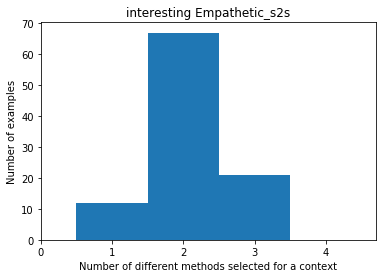

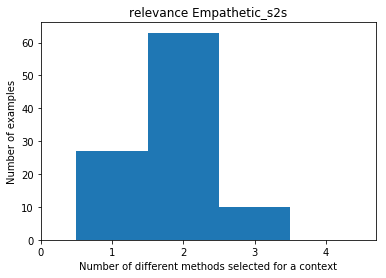

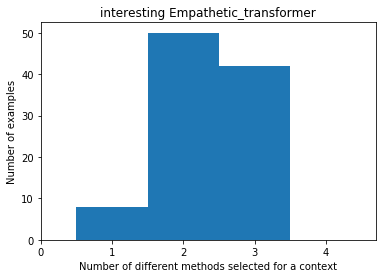

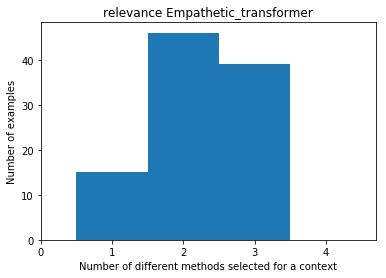

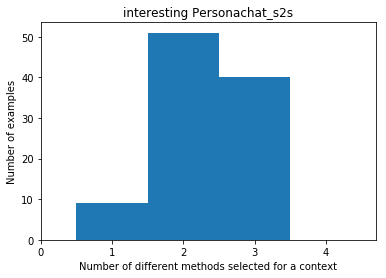

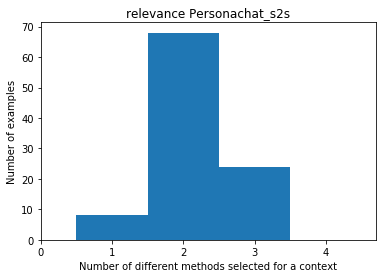

In [280]:
for (dataset, model), df in choice_df.groupby(['dataset', 'model']):
#     print(dataset, model)
#     print('=========')
    data_model_key = '%s_%s' % (dataset, model)
    
    
    plt.hist(num_selected[data_model_key]['int'], bins=np.arange(5)+.5)
    plt.xticks(np.arange(5))
    plt.ylabel('Number of examples')
    plt.xlabel('Number of different methods selected for a context')
    plt.title('interesting ' + data_model_key)
    plt.show()


    plt.hist(num_selected[data_model_key]['rel'], bins=np.arange(5)+.5)
    plt.xticks(np.arange(5))
    plt.ylabel('Number of examples')
    plt.xlabel('Number of different methods selected for a context')
    plt.title('relevance ' + data_model_key)
    plt.show()


### Which method wins when workers agree? 

In [305]:
counts_workers_agree = {}

for (dataset, model), df in choice_df.groupby(['dataset', 'model']):
    print(dataset, model)
    print('=========')
    data_model_key = '%s_%s' % (dataset, model)
    counts_workers_agree[data_model_key] = {'int':[], 'rel':[]}
    

    for s in ['int', 'rel']:
        print(s)
        counts_workers_agree[data_model_key][s] = Counter(selected_when_less_2[data_model_key][s])
        print(counts_workers_agree[data_model_key][s].most_common(),'\n')
#         print('\n'.join(['%s  %s' % (counts_workers_agree[data_model_key][s][m], m) for m in method_order])+'\n\n')

    print('\n\n')

Empathetic s2s
int
[('idfswapping', 28), ('idf', 25), ('vanilla', 16), ('face', 10)] 

rel
[('vanilla', 39), ('idfswapping', 25), ('idf', 22), ('face', 4)] 




Empathetic transformer
int
[('vanilla', 19), ('idfswapping', 17), ('idf', 12), ('face', 10)] 

rel
[('idf', 26), ('vanilla', 21), ('idfswapping', 10), ('face', 4)] 




Personachat s2s
int
[('face', 17), ('vanilla', 16), ('idf', 14), ('idfswapping', 13)] 

rel
[('vanilla', 25), ('idf', 22), ('idfswapping', 20), ('face', 9)] 






# Worker stats

In [282]:
choice_df.groupby('worker_id').agg(np.size)

,hit_num,dataset,model,most_int,most_rel,message1,message2,vanilla,idf,idfswapping,face,gram_vanilla,gram_idf,gram_idfswapping,gram_face,context
worker_id,,,,,,,,,,,,,,,,
A110KENBXU7SUJ,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
A11BSFO4LMHPXQ,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
A11Q8U6QTT8KGF,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
A18WCPDCDP4IAS,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
A1AF25FCVKC87X,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
A1ATL3G98SFW4V,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
A1DCKRRPA4AWVD,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
A1ET2J1PIP0RGO,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110
A1EZ1021PEAFQJ,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10


# Are interestingness and relatedness tied?

In [283]:
for (dataset, model), df in choice_df.groupby(['dataset', 'model']):
    print(dataset, model)
    print('=========')
    data_model_key = '%s_%s' % (dataset, model)
    
    df['same'] = (df['most_int'] == df['most_rel'])
    
    print(df.groupby('most_int')['same'].agg({'count': np.size, 'frac_both': np.mean}))
    print(df.groupby('most_rel')['same'].agg({'count': np.size, 'frac_both': np.mean}))
    
    print('\n\n')
    

Empathetic s2s
             count  frac_both
most_int                     
face            47   0.106383
idf             89   0.146067
idfswapping     98   0.265306
vanilla         66   0.348485
             count  frac_both
most_rel                     
face            24   0.208333
idf             72   0.180556
idfswapping     85   0.305882
vanilla        119   0.193277



Empathetic transformer
             count  frac_both
most_int                     
face            57   0.368421
idf             74   0.175676
idfswapping     88   0.125000
vanilla         81   0.197531
             count  frac_both
most_rel                     
face            40   0.525000
idf            100   0.130000
idfswapping     64   0.171875
vanilla         96   0.166667



Personachat s2s


/data/odemasi/anaconda3/envs/acts_venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/data/odemasi/anaconda3/envs/acts_venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
/data/odemasi/anaconda3/envs/acts_venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  if __name__ == '__main__':


             count  frac_both
most_int                     
face            84   0.202381
idf             72   0.138889
idfswapping     72   0.194444
vanilla         72   0.166667
             count  frac_both
most_rel                     
face            48   0.354167
idf             82   0.121951
idfswapping     80   0.175000
vanilla         90   0.133333





Empathetic s2s


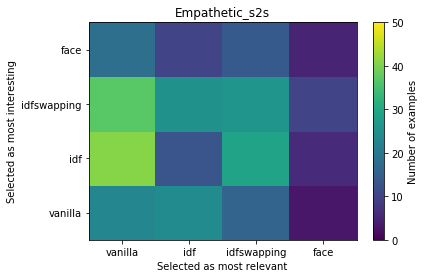

Empathetic transformer


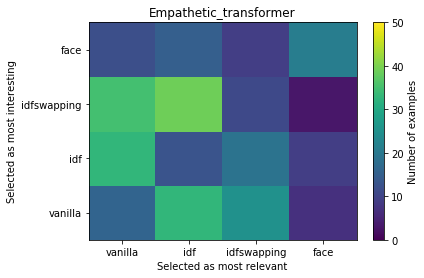

Personachat s2s


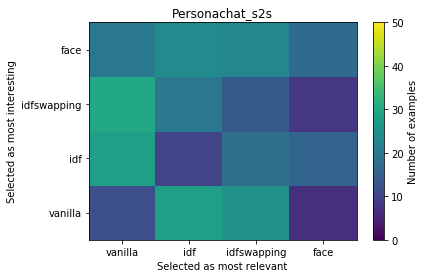

In [306]:
for (dataset, model), df in choice_df.groupby(['dataset', 'model']):
    print(dataset, model)
    print('=========')
    data_model_key = '%s_%s' % (dataset, model)
    
    cross_mat = np.NaN * np.zeros((len(method_order), len(method_order)))
    for i, m1 in enumerate(method_order):
        for j, m2 in enumerate(method_order):
            cross_mat[i,j] = np.sum((df['most_int'] == m1) & (df['most_rel'] == m2))
    plt.pcolor(cross_mat, vmin=0, vmax=50)
    plt.xticks(.5 + np.arange(len(method_order)), method_order)
    plt.yticks(.5 + np.arange(len(method_order)), method_order)
    plt.xlabel('Selected as most relevant')
    plt.ylabel('Selected as most interesting')
    plt.colorbar(label='Number of examples')
    plt.title(data_model_key)
    plt.show()